### q7 part 2

## Ahmad Soni - 668564
## Nasiem Ayob - 1825850

In [1]:
import pandas as pd
import matplotlib.pyplot as plt #if using matplotlib
import plotly.express as px #if using plotly
import geopandas as gpd
import geopandas
import numpy as np

In [2]:
!pip install pandas fiona shapely pyproj rtree

In [3]:
from shapely.geometry import Point

In [4]:
df = pd.read_csv('nyc_taxis.csv') # use the cleaned dataset
#df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
#df = df.head()

In [5]:
df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373


In [6]:
map_df = geopandas.read_file('boroughs.shp')
map_df = map_df.drop(['boro_code', 'county_fip', 'ntacode', 'ntaname', 'shape_area', 'shape_leng'], axis=1)
map_df.columns = ['District','geometry']
map_df.head()

,District,geometry
0,Queens,"POLYGON ((-73.80379 40.77561, -73.80099 40.775..."
1,Queens,"POLYGON ((-73.86110 40.76366, -73.85993 40.762..."
2,Queens,"POLYGON ((-73.77758 40.73019, -73.77849 40.729..."
3,Manhattan,"POLYGON ((-73.97301 40.76428, -73.97141 40.763..."
4,Bronx,"MULTIPOLYGON (((-73.88064 40.81852, -73.88098 ..."


In [7]:
geos = []
def checkDistrict(x,y):
    dist = ""
    geo = ""
    p = Point(x,y)
    
    for index, row in map_df.iterrows():
        if (row['geometry'].contains(p)):
            dist = row['District']
            geos.append(row['geometry'])
            
    return dist   

In [8]:
def createPoint(x,y):
    p = Point(x,y)
            
    return p   

In [9]:
def getGeometry(row):
    
    for index, row in map_df.iterrows():
        if (row == row['geometry']):
            geo = row['geometry']
            
    return geo

In [10]:
def countDistrict(row):
    c = 0
    
    if row == "Queens": c = 58
        
    if row == "Brooklyn": c = 51
        
    if row == "Bronx": c = 38
        
    if row == "Manhattan": c = 29
    
    if row == "Staten Island": c = 19
    
    return c   

In [11]:
coords_dict = df[['pickup_longitude', 'pickup_latitude']].value_counts().to_dict()

In [12]:
def getCount(x,y):
    
    p = (x,y)
    
    return coords_dict[p]    

In [13]:
df['count']= df.apply (lambda row: getCount(row[5],row[6]), axis=1)

In [14]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,count
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,1
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,1
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2


In [15]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,count
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,1
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,1
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2


In [16]:
#df = df.assign(District = df.apply(lambda row: checkDistrict(row[5],row[6])[0], axis=1), Geomtery = df.apply(lambda row: checkDistrict(row[5],row[1])[1], axis=1))

In [17]:
#df['Sum'] = df.apply (lambda row: countDistrict(row[15]), axis=1)

In [18]:
import shapely.speedups

shapely.speedups.enable()

In [19]:
df_p = df[['pickup_latitude','pickup_longitude','count']]

In [20]:
df_p.columns = ('lat', 'lon', 'count')

In [21]:
df_p

,lat,lon,count
0,40.767937,-73.982155,1
1,40.738564,-73.980415,1
2,40.763939,-73.979027,1
3,40.719971,-74.010040,1
4,40.793209,-73.973053,2
...,...,...,...
1458639,40.745522,-73.982201,1
1458640,40.747379,-74.000946,1
1458641,40.768799,-73.959129,1
1458642,40.749062,-73.982079,1


In [22]:
shp = geopandas.read_file('boroughs.shp')

In [23]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Polygon, Point

gdf_p = gpd.GeoDataFrame(df_p, geometry=[Point(x,y) for x,y in zip(df_p.lon, df_p.lat)])

sum_hex = []
spatial_index = gdf_p.sindex

for index, row in shp.iterrows():
    polygon = row.geometry
    possible_matches_index = list(spatial_index.intersection(polygon.bounds))
    possible_matches = gdf_p.iloc[possible_matches_index]
    precise_matches = possible_matches[possible_matches.within(polygon)]
    sum_hex.append(sum(precise_matches['count']))

shp['sum'] = sum_hex

In [24]:
shp

,boro_code,boro_name,county_fip,ntacode,ntaname,shape_area,shape_leng,geometry,sum
0,4.0,Queens,081,QN51,Murray Hill,5.248828e+07,33266.904856,"POLYGON ((-73.80379 40.77561, -73.80099 40.775...",11
1,4.0,Queens,081,QN27,East Elmhurst,1.972685e+07,19816.711894,"POLYGON ((-73.86110 40.76366, -73.85993 40.762...",217
2,4.0,Queens,081,QN41,Fresh Meadows-Utopia,2.777485e+07,22106.431272,"POLYGON ((-73.77758 40.73019, -73.77849 40.729...",17
3,1.0,Manhattan,061,MN17,Midtown-Midtown South,3.019153e+07,27032.700375,"POLYGON ((-73.97301 40.76428, -73.97141 40.763...",293418
4,2.0,Bronx,005,BX09,Soundview-Castle Hill-Clason Point-Harding Park,5.198380e+07,67340.977626,"MULTIPOLYGON (((-73.88064 40.81852, -73.88098 ...",7
...,...,...,...,...,...,...,...,...,...
190,4.0,Queens,081,QN17,Forest Hills,5.782329e+07,36173.649760,"POLYGON ((-73.83103 40.71434, -73.83115 40.714...",272
191,4.0,Queens,081,QN99,park-cemetery-etc-Queens,3.069272e+08,485889.330514,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ...",294
192,2.0,Bronx,005,BX27,Hunts Point,4.969340e+07,43708.270083,"POLYGON ((-73.88439 40.82297, -73.88436 40.822...",15
193,5.0,Staten Island,085,SI12,Mariner's Harbor-Arlington-Port Ivory-Granitev...,8.945551e+07,71207.556085,"MULTIPOLYGON (((-74.15946 40.64145, -74.15975 ...",1


(-74.28337047814922, -73.67222994821337, 40.47516404814216, 40.93650271647433)

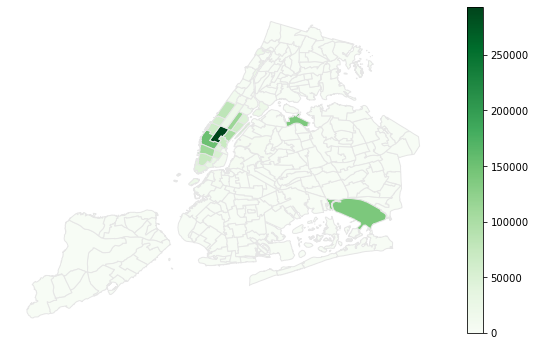

In [25]:
fig, ax = plt.subplots(1, figsize=(10,6))
shp.plot(column='sum', cmap='Greens', linewidth=1, ax=ax, edgecolor='0.9', legend = True)
ax.axis('off')